Delta-x Workshop

Accoustic Doppler Current Profiler:
https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1939

Christensen, A.L., J.M. Mallard, and J. Nghiem. 2021. Delta-X: Acoustic Doppler Current Profiler Channel Surveys, Coastal Louisiana, 2021. ORNL DAAC, Oak Ridge, Tennessee, USA. https://doi.org/10.3334/ORNLDAAC/1939


In [2]:
import rasterio
import rasterio.plot
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

field_path = os.getcwd()

basemap = rasterio.open(field_path + '/basemap.tif')

In [3]:
##PC
summary_file = pd.read_csv(field_path + "\DeltaX_ADCP_Measurements_1939\data\DeltaX_RiverDischarge_Spring2021.csv")
##MAC
##summary_file = pd.read_csv(field_path + "/DeltaX_ADCP_Measurements_1939/data/DeltaX_RiverDischarge_Spring2021.csv")

summary_file.head()

,basin,campaign,transect,location,site_name,replicate,planned_latitude,planned_longitude,start_date,start_time,...,boat_speed,mean_speed,discharge_side,discharge_top,discharge_middle,discharge_bottom,discharge_total,flow_direction,filename,profiler_id
0,Atchafalaya,Spring 2021,0,ATCH-ICWW,ICWW-A,1,29.644505,-91.368047,20210326,13:44:29,...,0.94,0.51,2.22,46.27,338.36,43.01,429.86,284.38,ADCP_20210326-091705_ATCH-ICWW_ICWW-A_000_Rep1...,Teledyne RiverPro
1,Atchafalaya,Spring 2021,0,ATCH-ICWW,ICWW-A,2,29.644505,-91.368047,20210326,13:47:58,...,0.86,0.54,5.65,43.49,324.22,42.86,416.22,286.02,ADCP_20210326-091705_ATCH-ICWW_ICWW-A_000_Rep2...,Teledyne RiverPro
2,Atchafalaya,Spring 2021,1,ATCH-ICWW,ICWW-A,1,29.644505,-91.368047,20210326,13:52:42,...,1.37,0.52,1.89,45.62,329.32,43.42,420.25,282.66,ADCP_20210326-095611_ATCH-ICWW_ICWW-A_001_Rep1...,Teledyne RiverPro
3,Atchafalaya,Spring 2021,1,ATCH-ICWW,ICWW-A,2,29.644505,-91.368047,20210326,13:55:03,...,1.25,0.50,3.05,43.69,317.87,42.42,407.02,287.21,ADCP_20210326-095611_ATCH-ICWW_ICWW-A_001_Rep2...,Teledyne RiverPro
4,Atchafalaya,Spring 2021,2,ATCH-ICWW,ICWW-B,1,29.640151,-91.319836,20210326,14:11:20,...,0.90,0.56,2.08,41.82,360.92,45.77,450.59,263.08,ADCP_20210326-100220_ATCH-ICWW_ICWW-B_002_Rep1...,Teledyne RiverPro


In [5]:
CRMS0421 = summary_file[summary_file['site_name'].str.contains('CRMS0421')]


In [ ]:
CRMS0421 = summary_file[summary_file['site_name'].str.contains('CRMS0421')]
xmin = np.min(CRMS0421['planned_longitude'])
ymin = np.min(CRMS0421['planned_latitude'])
xmax = np.max(CRMS0421['planned_longitude'])
ymax = np.max(CRMS0421['planned_latitude'])

fig, ax = plt.subplots(figsize=(10,10))
rasterio.plot.show(basemap,transform=basemap.transform,vmin=-1,vmax=2,ax=ax,cmap='Greys_r')
plt.axis([xmin-0.01, xmax+0.01, ymin-0.005, ymax+0.005])
import string
CRMS0421.plot(x="planned_longitude", y="planned_latitude", ax=ax,kind="scatter")

for k, v in CRMS0421.iterrows():
    ax.annotate(v['site_name'],[v['planned_longitude'],v['planned_latitude']],
               xytext=(-10,-15), textcoords='offset points',
               family='sans-serif', fontsize=10, color='black')

In [14]:
means = CRMS0421.groupby(['site_name'])['discharge_total'].mean()
stdevs = CRMS0421.groupby(['site_name'])['discharge_total'].std()

<AxesSubplot:title={'center':'Total Discharge'}, ylabel='site_name'>

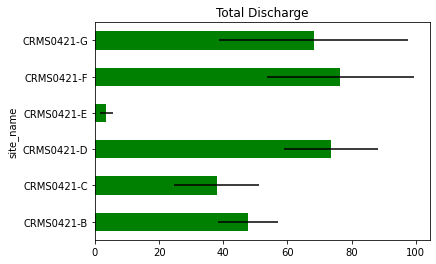

In [15]:
qual = CRMS0421.groupby(['site_name'])['discharge_total'].agg([np.mean, np.std])

qual.plot(kind = "barh", y = "mean", legend = False,
          xerr = "std", title = "Total Discharge", color='green', ylabel='Total Discharge (m3/s)')

If we look at a particular collection period, where transects are measured within the same time period, we can compare discharge values along a channel to estimate flow of water through the marshes. 



In [21]:
CRMS0421_first = CRMS0421[pd.to_datetime(CRMS0421['start_date'].astype('string') + " " +CRMS0421['start_time'])<'04-06-2021 16:0:00']


In [67]:
CRMS0421_first.groupby(['site_name'])['discharge_total'].mean()


site_name
CRMS0421-B    33.2880
CRMS0421-C    19.5755
CRMS0421-D    69.5555
CRMS0421-E     3.4100
CRMS0421-F    83.9720
CRMS0421-G    85.0510
Name: discharge_total, dtype: float64

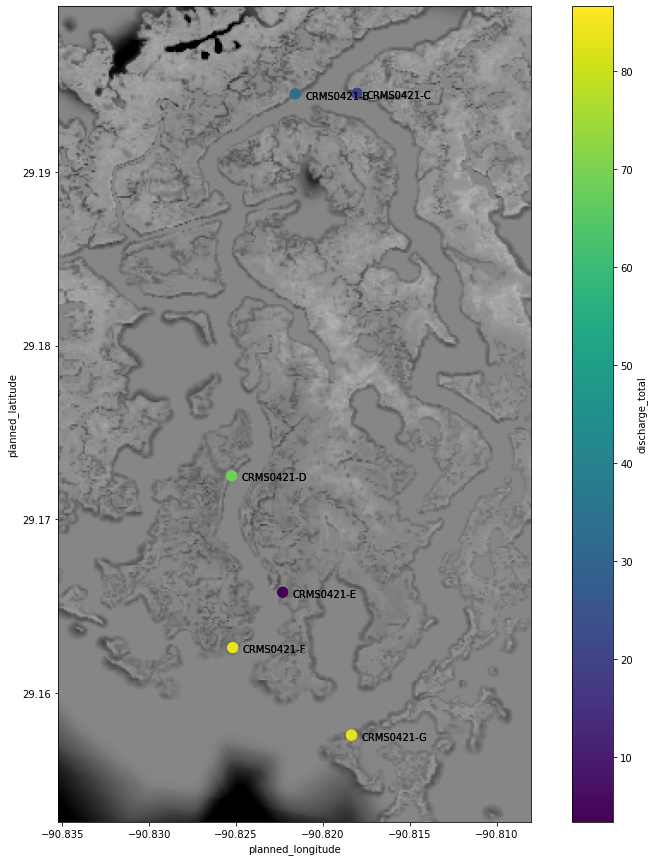

In [32]:
fig, ax = plt.subplots(figsize=(15,15))
rasterio.plot.show(basemap,transform=basemap.transform,vmin=-1,vmax=2,ax=ax,cmap='Greys_r')
plt.axis([xmin-0.01, xmax+0.01, ymin-0.005, ymax+0.005])
import string
CRMS0421_first.plot(x="planned_longitude", y="planned_latitude",ax=ax,kind="scatter",s=100,c="discharge_total",cmap="viridis")

for k, v in CRMS0421_first.iterrows():
    ax.annotate(v['site_name'],[v['planned_longitude'],v['planned_latitude']],
               xytext=(10,-5), textcoords='offset points',
               family='sans-serif', fontsize=10, color='black')

Transect B, D, and F occur along the same channel. Changes in discharge from upstream to downstream would indicate flow into or out of the adjacent marshes. 
Flow goes from 33 m3/s at transect B, to 70 m3/s at transect D, to 85 m3/s at transect F. 

At this time, the tide is rising, meaning water is most likely flowing north. Therefore, this could indicate that 15m3/s moves from channels to marshes between transect F and transect D and 36 m3/s moves from channels to marshes between transect D and B.


